In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
import os
import pandas as pd

# Veri setinin dizinleri
na_fish_data_dir = '/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset'
fish_data_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset'

image_paths = []
labels = []

# NA_Fish_Dataset dizinindeki balık türleri için resimleri oku
for fish in os.listdir(na_fish_data_dir):
    fish_dir = os.path.join(na_fish_data_dir, fish)
    
    # Eğer bu bir dizin değilse atla
    if not os.path.isdir(fish_dir):
        continue
    
    for img in os.listdir(fish_dir):
        # Resim uzantısını kontrol et
        if img.endswith(('.png', '.jpg', '.jpeg')):  # Diğer uzantıları da ekleyin
            image_paths.append(os.path.join(fish_dir, img))
            labels.append(fish)

# Fish_Dataset dizinini kontrol et
for sub_dir in os.listdir(fish_data_dir):
    sub_dir_path = os.path.join(fish_data_dir, sub_dir)
    if os.path.isdir(sub_dir_path):
        for img in os.listdir(sub_dir_path):
            if img.endswith(('.png', '.jpg', '.jpeg')):  # Diğer uzantıları da ekleyin
                image_paths.append(os.path.join(sub_dir_path, img))
                labels.append(sub_dir)

# DataFrame oluşturma
data = pd.DataFrame({'image': image_paths, 'label': labels})

# DataFrame'i inceleyin
print(data.head())
print("Toplam resim sayısı:", len(data))


                                               image            label
0  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
1  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
2  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
3  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
4  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
Toplam resim sayısı: 282


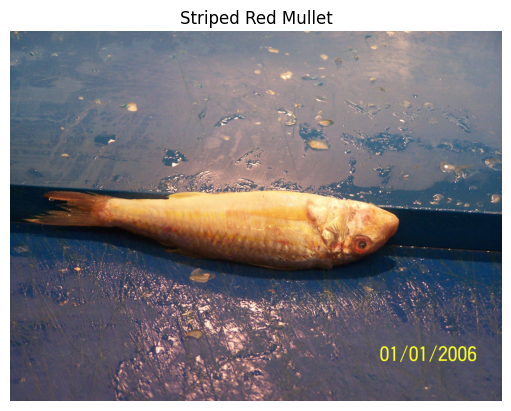

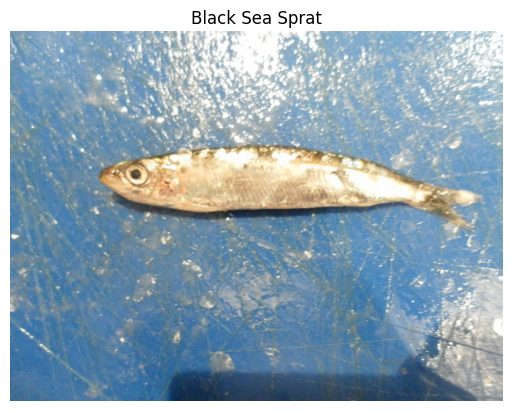

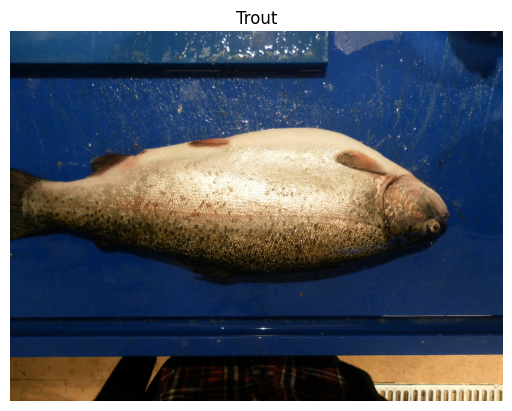

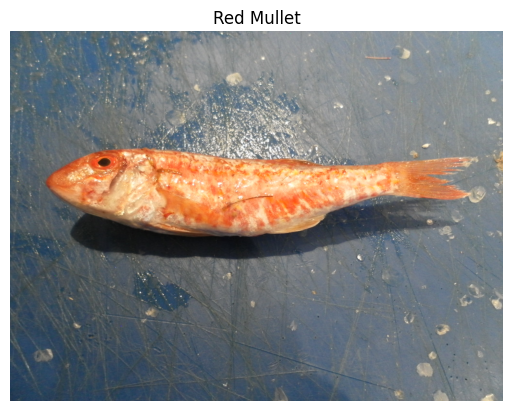

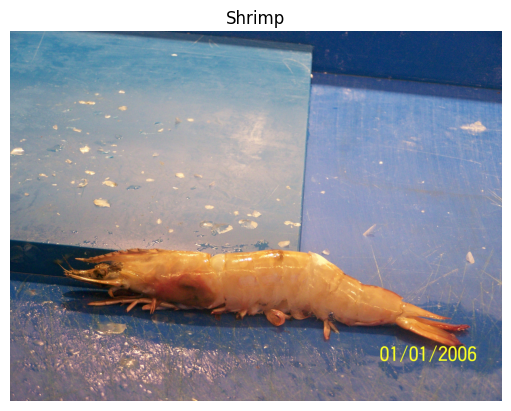

In [33]:
import matplotlib.pyplot as plt

# Görselleştirme örneği
sample = data.sample(5)
for index, row in sample.iterrows():
    img = Image.open(row['image'])
    plt.imshow(img)
    plt.title(row['label'])
    plt.axis('off')
    plt.show()


In [35]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Resim boyutları
img_height = 128  # Resim yüksekliği
img_width = 128   # Resim genişliği

# Sınıf sayısını tanımlama
num_classes = len(data['label'].unique())  # Etiketlerin sayısı

# Model oluşturma
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # İlk katmanı Input olarak tanımlayın
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Model derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modelin özetini yazdırma
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,292,616 (24.00 MB)

 Trainable params: 6,292,616 (24.00 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

# Resim yollarını ve etiketleri NumPy dizisine dönüştür
X = np.array(data['image'])
y = np.array(data['label'])

# Eğitim ve doğrulama setlerini oluştur
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin boyutlarını kontrol edin
print("Eğitim seti boyutu:", len(X_train))
print("Doğrulama seti boyutu:", len(X_val))


Eğitim seti boyutu: 225
Doğrulama seti boyutu: 57


In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_height, img_width = 128, 128  # Resim boyutunu ayarlayın
num_classes = len(np.unique(y))  # Sınıf sayısını ayarlayın

# Resimleri yükle ve yeniden boyutlandır
def load_and_preprocess_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img) / 255.0  # Normalizasyon
        images.append(img_array)
    return np.array(images)

# Eğitim ve doğrulama setlerindeki resimleri yükle
X_train_processed = load_and_preprocess_images(X_train)
X_val_processed = load_and_preprocess_images(X_val)

# Eğitim setinin boyutunu kontrol et
print("Eğitim seti boyutu (işlenmiş):", X_train_processed.shape)


Eğitim seti boyutu (işlenmiş): (225, 128, 128, 3)


In [39]:
print(type(X_train_processed))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [61]:
from sklearn.preprocessing import LabelEncoder

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Modeli eğitme
history = model.fit(X_train_processed, y_train_encoded, epochs=10, validation_data=(X_val_processed, y_val_encoded))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.5052 - loss: 1.3078 - val_accuracy: 0.6491 - val_loss: 1.0428
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 419ms/step - accuracy: 0.5501 - loss: 1.2065 - val_accuracy: 0.6491 - val_loss: 0.9160
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.5819 - loss: 1.0256 - val_accuracy: 0.6140 - val_loss: 0.8056
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.5196 - loss: 1.1099 - val_accuracy: 0.6667 - val_loss: 0.6966
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 469ms/step - accuracy: 0.6621 - loss: 0.9115 - val_accuracy: 0.7193 - val_loss: 0.6607
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.7172 - loss: 0.8081 - val_accuracy: 0.7018 - val_loss: 0.7250
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.6499 - loss: 0.9199 - val_accuracy: 0.8070 - val_loss: 0.6360
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 0.7440 - loss: 0.7316 - val_accuracy: 0.7719 - val_loss:

In [47]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_processed)


In [60]:
history = model.fit(datagen.flow(X_train_processed, y_train_encoded, batch_size=32),
                    epochs=10,
                    validation_data=(X_val_processed, y_val_encoded))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - accuracy: 0.4066 - loss: 1.4840 - val_accuracy: 0.4561 - val_loss: 1.2828
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step - accuracy: 0.3610 - loss: 1.6027 - val_accuracy: 0.4561 - val_loss: 1.3537
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 481ms/step - accuracy: 0.4051 - loss: 1.4446 - val_accuracy: 0.5965 - val_loss: 1.1566
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 437ms/step - accuracy: 0.4233 - loss: 1.3837 - val_accuracy: 0.5965 - val_loss: 1.1177
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.4165 - loss: 1.4899 - val_accuracy: 0.5965 - val_loss: 1.0999
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.3796 - loss: 1.4369 - val_accuracy: 0.4211 - val_loss: 1.3633
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 415ms/step - accuracy: 0.4688 - loss: 1.4159 - val_accuracy: 0.5965 - val_loss: 1.0721
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 467ms/step - accuracy: 0.3753 - loss: 1.4237 - val_accuracy: 0.7368 - val_loss:

In [55]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


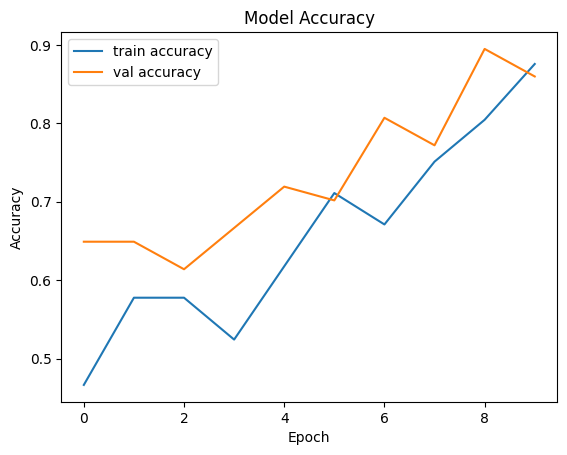

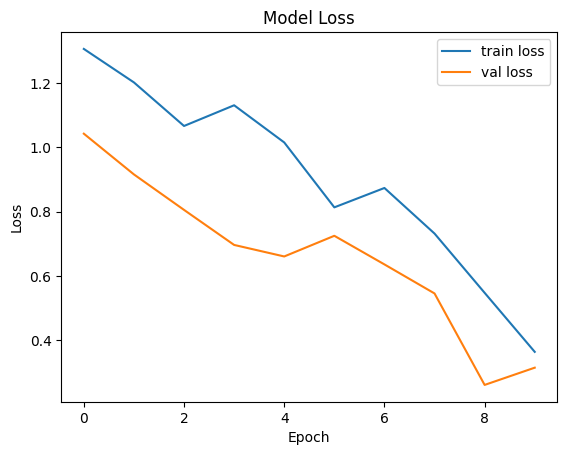

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [63]:
from keras.optimizers import Adam

# Yeni bir optimizer tanımlama
optimizer = Adam(learning_rate=0.001) 

# Modeli derleme
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(datagen.flow(X_train_processed, y_train_encoded, batch_size=32),
                    epochs=20,  
                    validation_data=(X_val_processed, y_val_encoded))


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.4801 - loss: 1.4037 - val_accuracy: 0.7895 - val_loss: 0.6013
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 421ms/step - accuracy: 0.5643 - loss: 1.1337 - val_accuracy: 0.8070 - val_loss: 0.5575
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.6690 - loss: 0.9507 - val_accuracy: 0.8421 - val_loss: 0.5144
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 420ms/step - accuracy: 0.6941 - loss: 0.8732 - val_accuracy: 0.8070 - val_loss: 0.4815
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step - accuracy: 0.6665 - loss: 1.0203 - val_accuracy: 0.8772 - val_loss: 0.4108
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 555ms/step - accuracy: 0.7858 - loss: 0.7222 - val_accuracy: 0.8947 - val_loss: 0.3653
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.7115 - loss: 0.8333 - val_accuracy: 0.9298 - val_loss: 0.2895
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.6689 - loss: 0.7885 - val_accuracy: 0.7895 - val_loss: 0.4977
Epo